In [1]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
trips = pd.read_csv('/home/florencia/Datos/Data/sf-bay-area-bike-share/trip.csv', low_memory=False)

In [3]:
trips.dtypes

id                     int64
duration               int64
start_date            object
start_station_name    object
start_station_id       int64
end_date              object
end_station_name      object
end_station_id         int64
bike_id                int64
subscription_type     object
zip_code              object
dtype: object

In [4]:
trips.head(10)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
5,4927,103,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109
6,4500,109,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
7,4563,111,8/29/2013 14:02,San Salvador at 1st,8,8/29/2013 14:04,San Salvador at 1st,8,687,Subscriber,95112
8,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103
9,4258,114,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060


In [5]:
trips.start_date = pd.to_datetime(trips.start_date, format='%m/%d/%Y %H:%M')
trips.end_date = pd.to_datetime(trips.end_date, format='%m/%d/%Y %H:%M')

trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
dtype: object

# Top 20 de las estaciones desde las cuales salen más bicicletas

<IPython.core.display.Javascript object>


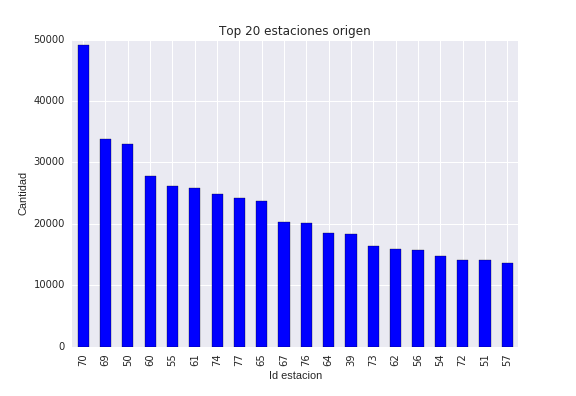

In [45]:
%matplotlib notebook

count_start_station = trips['start_station_id'].value_counts()

css = count_start_station[:20].plot('bar', title = 'Top 20 estaciones origen')
css.set_ylabel('Cantidad')
css.set_xlabel('Id estacion')

## Top 20 de las estaciones a las cuales llegan más bicicletas

<IPython.core.display.Javascript object>


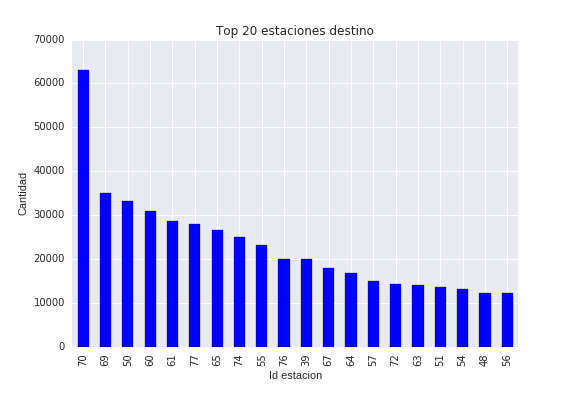

In [44]:
%matplotlib notebook

count_end_station = trips['end_station_id'].value_counts()
count_end_station

ces = count_end_station[:20].plot('bar', title = 'Top 20 estaciones destino' )
ces.set_ylabel('Cantidad')
ces.set_xlabel('Id estacion')

## Top 15 viajes más comunes según origen y destino

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


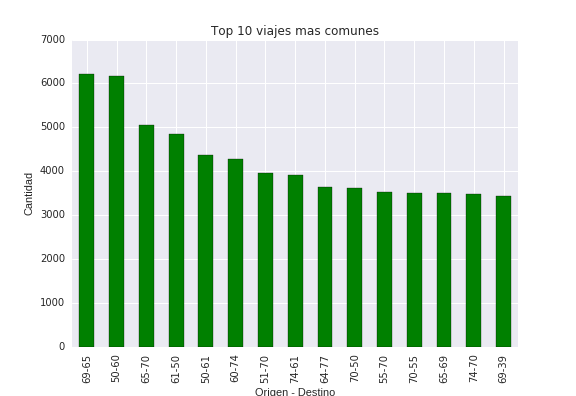

In [43]:
%matplotlib notebook

common_trips = trips[['start_station_id','end_station_id']]

common_trips.start_station_id = common_trips.start_station_id.astype(str)
common_trips.end_station_id = common_trips.end_station_id.astype(str)

common_trips['start_end'] = (common_trips.start_station_id + '-' + common_trips.end_station_id)

aux = common_trips['start_end'].value_counts()
ct = aux[:15].plot(kind='bar',title='Top 15 viajes mas comunes',color='green')
ct.set_ylabel('Cantidad')
ct.set_xlabel('Origen - Destino')
